In [1]:
"""This module is gonna be the center of control of my programm. That's where I am gonna lunch the execution of the different parts of the code. Depending on what I want to do, I will run part(s) of the project or the whole one. For instance, if I want to test the complete programm I will be able to run all with one click. At the opposite, if I want to test a new module functionnning, I will run this one only. """

"This module is gonna be the center of control of my programm. That's where I am gonna lunch the execution of the different parts of the code. Depending on what I want to do, I will run part(s) of the project or the whole one. For instance, if I want to test the complete programm I will be able to run all with one click. At the opposite, if I want to test a new module functionnning, I will run this one only. "

.ipynb settings

In [1]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

In [2]:
#src.useful_functions

if __name__ == '__main__':
    import useful_functions



# I) <u> Raw data importation, visualisation, cleaning(<-not yet)  </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Import csv data</font>

In [3]:
#src.data.make_dataset


if __name__ == '__main__':
    from data import make_dataset

Footy_stats_files = [make_dataset.footy_2015_adr, make_dataset.footy_2016_adr,
                     make_dataset.footy_2017_adr, make_dataset.footy_2018_adr, 
                     make_dataset.footy_2019_adr, make_dataset.footy_2020_adr,
                     make_dataset.footy_2021_adr, make_dataset.footy_2022_adr, 
                     make_dataset.footy_2023_adr]

Football_data_files = [make_dataset.football_data_2015_adr, make_dataset.football_data_2016_adr,
                       make_dataset.football_data_2017_adr, make_dataset.football_data_2018_adr,
                       make_dataset.football_data_2019_adr, make_dataset.football_data_2020_adr,
                       make_dataset.football_data_2021_adr, make_dataset.football_data_2022_adr,
                       make_dataset.football_data_2023_adr]

# convert csv files into big dataframes
# Footy dataset
footy_dataset_to_save_01 = make_dataset.read_data(Footy_stats_files, 'footy')
# Football-Data dataset
football_data_dataset_to_save_01 = make_dataset.read_data(Football_data_files, 'football data')

#We delete a line full of Nan values
football_data_dataset_to_save_01.drop(760, inplace = True)
football_data_dataset_to_save_02 = football_data_dataset_to_save_01.reset_index(drop=False)



# We save the dataframes created into data/interim folder, after having deleted the old ones.
#Footy Stats dataset
make_dataset.save_dataframe_into_data_interim(footy_dataset_to_save_01, 'footy')
#Football-Data dataset
make_dataset.save_dataframe_into_data_interim(football_data_dataset_to_save_02, 'football_data')

The old footy_data_interim.pkl file, and the new one ARE the same
The old 'footy_data_interim.pkl' file was well deleted
The new 'footy_data_interim.pkl' file was well saved 

The old football_data_data_interim.pkl file, and the new one ARE the same
The old 'football_data_data_interim.pkl' file was well deleted
The new 'football_data_data_interim.pkl' file was well saved 



<span style="color:#FF1493;"> <strong> <font size="4">2) Combine data of 'Footy Stats' and 'Football Data' datasets</font>

In [4]:
#src.data.data_combination

from data import data_combination

# Open the dataframes saved
# Footy dataset
dataset_footy_01 = make_dataset.load_data(True, 'footy')
# Footabll Data dataset
dataset_football_data_01 = make_dataset.load_data(True, 'football_data')

# Uniformise teams names
dataset_football_data_02, dataset_footy_02 = data_combination.team_names_uniformisation(dataset_football_data_01.copy(), dataset_footy_01.copy())

# Replace Footy Stats shots by the values of Football Data
dataset_footy_03 = data_combination.replace_col_values('home_team_shots', 'HS', dataset_footy_02.copy(), dataset_football_data_02.copy())
dataset_footy_04 = data_combination.replace_col_values('away_team_shots', 'AS', dataset_footy_03.copy(), dataset_football_data_02.copy())
# Replace Footy Stats shots_on_target by the values of Football Data
dataset_footy_05 = data_combination.replace_col_values('home_team_shots_on_target', 'HST', dataset_footy_04.copy(), dataset_football_data_02.copy())
dataset_footy_06 = data_combination.replace_col_values('away_team_shots_on_target', 'AST', dataset_footy_05.copy(), dataset_football_data_02.copy())

dataset_01 = dataset_footy_06

The footy dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023]
The football_data dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023]
In the column home_team_shots of footy_dataset, 3318 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots of footy_dataset, 3318 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column home_team_shots_on_target of footy_dataset, 3318 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots_on_target of footy_dataset, 3318 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.


<span style="color:#FF1493;"> <strong> <font size="4">3) Visualize raw data</font>

In [5]:
#src.visualization.visualize
"""
if __name__ == '__main__':
    from visualization import visualize


#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.

visualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)
"""

"\nif __name__ == '__main__':\n    from visualization import visualize\n\n\n#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.\n\nvisualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)\n"

# II) <u> Features engineering  </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Create columns for new features:</font>

In [6]:
#features.initialize_new_features_columns

if __name__ == '__main__':
    from features import initialize_new_features_columns

#We create the new columns in dataset and stock the columns ranks variables into dico_col_rk
dataset_02, dico_col_rk = initialize_new_features_columns.add_columns_and_complete_col_ranks(dataset_01.copy())

#We execute a test to verify the columns and columns ranks variables have been correcctly created
initialize_new_features_columns.test_columns_ranks(dico_col_rk, theoritical_df_col_nb = 203, dataset_0 = dataset_02.copy())


the function add_columns_and_complete_col_ranks() was executed correctly


True

<span style="color:#FF1493;"> <strong> <font size="4"> 2) Create new features:</font>

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Resultat
</span style="color:#FF1493;"> </font size="4">

(pm = pre-match)
(sbos = since the beginning of the season)

In [7]:
#src.features.make_new_features
if __name__ == '__main__':
    from features import make_new_features


#We add the matchs results 
dataset_03 = make_new_features.matchs_results(dataset_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['RH',
                                            'RA'], dataset_02.copy(), dataset_03.copy(), 'dataset_02', 'dataset_03')


#We add the Home or Away status of the teams
dataset_04 = make_new_features.home_away_status(dataset_03.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_H_A_status',
                                            'AT_H_A_status'], dataset_03.copy(), dataset_04.copy(), 'dataset_03', 'dataset_04')


#Calculation and manipulation of NB DE MATCHS et NB DE VICTOIRES (pm, sbos)
#VARIABLES                    V 
# We add the number of matches and number of victories
dataset_05 = make_new_features.nb_matchs_nb_victories(dico_col_rk.copy(), dataset_04.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_played_matchs_nb',
                                            'AT_played_matchs_nb',
                                            'HT_victories_nb',
                                            'AT_victories_nb'], dataset_04.copy(), dataset_05.copy(), 'dataset_04', 'dataset_05')

#Calculation and manipulation of VICTORY (pm, sbos):
#VARIABLE                     X
#PER MATCH AVG                V 
#PER MATCH AVG HT/AT DIFF     V
#We add the avg victories per match and its HT-AT difference
dataset_06 = make_new_features.victories_per_match_AVG_and_DIFF(dataset_05.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_victory_pm',
                                            'AT_avg_victory_pm',
                                            'Diff_HT_avg_victory_pm',
                                            'Diff_AT_avg_victory_pm'], dataset_05.copy(), dataset_06.copy(), 'dataset_05', 'dataset_06')

#(POINTS COLLECTED x (1 + ADVERSARY AVG VICTORY PER MATCH)) (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the avg points per match ponderated by adversary perf, and its HT-AT difference
dataset_07 = make_new_features.points_pm_ponderated_by_adversary_perf(dico_col_rk.copy(), dataset_06.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_points_ponderated_by_adversary_perf',
                                            'AT_points_ponderated_by_adversary_perf',
                                            'HT_avg_pm_points_ponderated_by_adversary_perf',  
                                            'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf'], dataset_06.copy(), dataset_07.copy(), 'dataset_06', 'dataset_07')

#Calculation and manipulation of NB OF SCORED GOALS and NB CONCEDED GOALS (pm, sbos)
#VARRIABLE                    V
#We add the nb of goals scored and conceded
dataset_08 = make_new_features.scored_and_conceded_goals(dico_col_rk.copy(), dataset_07.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['scored_goals_HT_PM',
                                            'conceded_goals_HT_PM',
                                            'scored_goals_AT_PM',  
                                            'conceded_goals_AT_PM'], dataset_07.copy(), dataset_08.copy(), 'dataset_07', 'dataset_08')


#GOAL DIFFERENCE (pm, sbos): 
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the goal difference
dataset_09 = make_new_features.goal_difference(dataset_08.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['goal_diff_HT_PM',
                                            'goal_diff_AT_PM',
                                            'HT_avg_goal_diff_pm',  
                                            'AT_avg_goal_diff_pm',
                                            'Diff_HT_goal_diff_pm',
                                            'Diff_AT_goal_diff_pm'], dataset_08.copy(), dataset_09.copy(), 'dataset_08', 'dataset_09')


#SCORED GOALS / CONCEDED GOALS (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                X 
#HT/AT DIFF                   V
#We add the ratio scored goals/conceded goals
dataset_10 = make_new_features.scored_conceded_goals_ratio(dataset_09.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_scored_g_conceded_g_ratio',
                                            'AT_avg_scored_g_conceded_g_ratio',
                                            'Diff_HT_avg_scored_g_conceded_g_ratio',  
                                            'Diff_AT_avg_scored_g_conceded_g_ratio'], dataset_09.copy(), dataset_10.copy(), 'dataset_09', 'dataset_10')


#POINTS NB (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the points number
dataset_11 = make_new_features.points_nb(dico_col_rk.copy(),dataset_10.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Prematch_HT_PN',
                                            'Prematch_AT_PN',
                                            'HT_avg_collected_points_pm',  
                                            'AT_avg_collected_points_pm',
                                            'Diff_pnt_HT_ratio',
                                            'Diff_pnt_AT_ratio'], dataset_10.copy(), dataset_11.copy(), 'dataset_10', 'dataset_11')



#RANKING (pm, sbos) :
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add ranks prematch
dataset_12 = make_new_features.ranking(dico_col_rk.copy(), dataset_11.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_week_ranking',
                                            'AT_week_ranking',
                                            'Diff_HT_ranking',  
                                            'Diff_AT_ranking'], dataset_11.copy(), dataset_12.copy(), 'dataset_11', 'dataset_12')


#ANNUAL BUDGET:
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the annual budgets of teams
dataset_13 = make_new_features.annnual_budget(dataset_12.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['annual budget of HT',
                                            'annual budget of AT',
                                            'Diff_HT_annual_budget',  
                                            'Diff_AT_annual_budget'], dataset_12.copy(), dataset_13.copy(), 'dataset_12', 'dataset_13')
#We test if there is no 0 values in the columns
useful_functions.is_there_x_values(0, ['annual budget of HT','annual budget of AT'], dataset_13.copy())


#POINTS NB ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the points nb on 1,3,5 last matchs
dataset_14 = make_new_features.points_nb_on_x_last_matchs(dico_col_rk.copy(), dataset_13.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Points_HT_5lm_PM',
                                            'Points_AT_5lm_PM',
                                            'Points_HT_3lm_PM',
                                            'Points_AT_3lm_PM',
                                            'Points_HT_1lm_PM',
                                            'Points_AT_1lm_PM',
                                            'HT_Diff_Points_5lm',  
                                            'AT_Diff_Points_5lm',
                                            'HT_Diff_Points_3lm',
                                            'AT_Diff_Points_3lm',
                                            'HT_Diff_Points_1lm',
                                            'AT_Diff_Points_1lm'], dataset_13.copy(), dataset_14.copy(), 'dataset_13', 'dataset_14')


#GOAL DIFF ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the goal diff on 1,3,5 last matches
dataset_15 = make_new_features.goal_diff_on_x_last_matchs(dico_col_rk.copy(), dataset_14.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['GoalDiff_HT_5lm_PM',
                                            'GoalDiff_AT_5lm_PM',
                                            'GoalDiff_HT_3lm_PM',
                                            'GoalDiff_AT_3lm_PM',
                                            'GoalDiff_HT_1lm_PM',
                                            'GoalDiff_AT_1lm_PM',
                                            'HT_Diff_Goal_Diff_5lm',  
                                            'AT_Diff_Goal_Diff_5lm',
                                            'HT_Diff_Goal_Diff_3lm',
                                            'AT_Diff_Goal_Diff_3lm',
                                            'HT_Diff_Goal_Diff_1lm',
                                            'AT_Diff_Goal_Diff_1lm'], dataset_14.copy(), dataset_15.copy(), 'dataset_14', 'dataset_15')


#RANKING ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the ranking on 1,3,5 last matches
dataset_16 = make_new_features.ranking_on_x_last_matchs(dico_col_rk.copy(), dataset_15.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_5lm_week_ranking',
                                            'AT_5lm_week_ranking',
                                            'HT_3lm_week_ranking',
                                            'AT_3lm_week_ranking',
                                            'HT_1lm_week_ranking',
                                            'AT_1lm_week_ranking',
                                            "Diff_HT_ranking_5lm",
                                            "Diff_AT_ranking_5lm",
                                            "Diff_HT_ranking_3lm",
                                            "Diff_AT_ranking_3lm",
                                            "Diff_HT_ranking_1lm",
                                            "Diff_AT_ranking_1lm"], dataset_15.copy(), dataset_16.copy(), 'dataset_15', 'dataset_16')

#We add the season of each match
#VARIABLE
dataset_17 = make_new_features.season_year(dataset_16.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Season_year'], dataset_16.copy(), dataset_17.copy(), 'dataset_16', 'dataset_17')


The DataFrames dataset_02 and dataset_03 are equal except for columns ['RH', 'RA']
The DataFrames dataset_03 and dataset_04 are equal except for columns ['HT_H_A_status', 'AT_H_A_status']
The DataFrames dataset_04 and dataset_05 are equal except for columns ['HT_played_matchs_nb', 'AT_played_matchs_nb', 'HT_victories_nb', 'AT_victories_nb']
The DataFrames dataset_05 and dataset_06 are equal except for columns ['HT_avg_victory_pm', 'AT_avg_victory_pm', 'Diff_HT_avg_victory_pm', 'Diff_AT_avg_victory_pm']
The DataFrames dataset_06 and dataset_07 are equal except for columns ['HT_points_ponderated_by_adversary_perf', 'AT_points_ponderated_by_adversary_perf', 'HT_avg_pm_points_ponderated_by_adversary_perf', 'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf']
The DataFrames dataset_07 and dataset_08 are equal except for columns ['scored_goals_HT_PM', 'conceded_goals_HT_PM', 'scored_goals_AT_PM', 'conce

True

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Jeu

In [8]:
#src.features.make_new_features

#CORNERS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_18 = make_new_features.corners_nb(dico_col_rk.copy(), dataset_17.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_corners_nb',
                                            'AT_corners_nb',
                                            'HT_Diff_avg_corners_nb',
                                            'AT_Diff_avg_corners_nb'], dataset_17.copy(), dataset_18.copy(), 'dataset_17', 'dataset_18')

#YELLOW, RED CARDS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_19 = make_new_features.yellow_red_cards(dico_col_rk.copy(), dataset_18.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_yellow_cards_nb',
                                            'AT_yellow_cards_nb',
                                            'HT_red_cards_nb',
                                            'AT_red_cards_nb',
                                            'HT_Diff_avg_yellow_cards_nb',
                                            'AT_Diff_avg_yellow_cards_nb',
                                            'HT_Diff_avg_red_cards_nb',
                                            'AT_Diff_avg_red_cards_nb',], dataset_18.copy(), dataset_19.copy(), 'dataset_18', 'dataset_19')

#SHOTS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_20 = make_new_features.shots_nb(dico_col_rk.copy(), dataset_19.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_nb',
                                            'AT_shots_nb',
                                            'HT_avg_shots_nb',
                                            'AT_avg_shots_nb',
                                            'HT_Diff_avg_shots_nb',
                                            'AT_Diff_avg_shots_nb'], dataset_19.copy(), dataset_20.copy(), 'dataset_19', 'dataset_20')

#SHOTS ON TARGET NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_21 = make_new_features.shots_on_target_nb(dico_col_rk.copy(), dataset_20.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_on_target_nb',
                                            'AT_shots_on_target_nb',
                                            'HT_avg_shots_on_target_nb',
                                            'AT_avg_shots_on_target_nb',
                                            'HT_Diff_avg_shots_on_target_nb',
                                            'AT_Diff_avg_shots_on_target_nb'], dataset_20.copy(), dataset_21.copy(), 'dataset_20', 'dataset_21')

#FOULS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_22 = make_new_features.fouls_nb(dico_col_rk.copy(), dataset_21.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_fouls_nb',
                                            'AT_fouls_nb',
                                            'HT_avg_fouls_nb',
                                            'AT_avg_fouls_nb',
                                            'HT_Diff_avg_fouls_nb',
                                            'AT_Diff_avg_fouls_nb'], dataset_21.copy(), dataset_22.copy(), 'dataset_21', 'dataset_22')

#POSSESSION (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_23 = make_new_features.possession(dico_col_rk.copy(), dataset_22.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_possession',
                                            'AT_possession',
                                            'HT_avg_possession',
                                            'AT_avg_possession',
                                            'HT_Diff_avg_possession',
                                            'AT_Diff_avg_possession'], dataset_22.copy(), dataset_23.copy(), 'dataset_22', 'dataset_23')

#EXPECTED GOALS / XG (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_24 = make_new_features.expected_goals(dico_col_rk.copy(), dataset_23.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_xg',
                                            'AT_xg',
                                            'HT_avg_xg',
                                            'AT_avg_xg',
                                            'HT_Diff_avg_xg',
                                            'AT_Diff_avg_xg'], dataset_23.copy(), dataset_24.copy(), 'dataset_23', 'dataset_24')

The DataFrames dataset_17 and dataset_18 are equal except for columns ['HT_corners_nb', 'AT_corners_nb', 'HT_Diff_avg_corners_nb', 'AT_Diff_avg_corners_nb']
The DataFrames dataset_18 and dataset_19 are equal except for columns ['HT_yellow_cards_nb', 'AT_yellow_cards_nb', 'HT_red_cards_nb', 'AT_red_cards_nb', 'HT_Diff_avg_yellow_cards_nb', 'AT_Diff_avg_yellow_cards_nb', 'HT_Diff_avg_red_cards_nb', 'AT_Diff_avg_red_cards_nb']
The DataFrames dataset_19 and dataset_20 are equal except for columns ['HT_shots_nb', 'AT_shots_nb', 'HT_avg_shots_nb', 'AT_avg_shots_nb', 'HT_Diff_avg_shots_nb', 'AT_Diff_avg_shots_nb']
The DataFrames dataset_20 and dataset_21 are equal except for columns ['HT_shots_on_target_nb', 'AT_shots_on_target_nb', 'HT_avg_shots_on_target_nb', 'AT_avg_shots_on_target_nb', 'HT_Diff_avg_shots_on_target_nb', 'AT_Diff_avg_shots_on_target_nb']
The DataFrames dataset_21 and dataset_22 are equal except for columns ['HT_fouls_nb', 'AT_fouls_nb', 'HT_avg_fouls_nb', 'AT_avg_fouls_nb',

True

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Côte

In [9]:
#src.features.make_new_features

# 1/VICTORY ODDS  (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_25 = make_new_features.odds_victory_proba(dico_col_rk.copy(), dataset_24.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_odds_victory_proba',
                                            'AT_odds_victory_proba',
                                            'HT_avg_odds_victory_proba',
                                            'AT_avg_odds_victory_proba',
                                            'HT_Diff_avg_odds_victory_proba',
                                            'AT_Diff_avg_odds_victory_proba'], dataset_24.copy(), dataset_25.copy(), 'dataset_24', 'dataset_25')

#Max odd
#Variable
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    X
dataset_26 = make_new_features.max_odd(dataset_25.copy(),  dataset_football_data_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HTW_Max_odd',
                                            'ATW_Max_odd',
                                            'D_Max_odd'], dataset_25.copy(), dataset_26.copy(), 'dataset_25', 'dataset_26')

The DataFrames dataset_24 and dataset_25 are equal except for columns ['HT_odds_victory_proba', 'AT_odds_victory_proba', 'HT_avg_odds_victory_proba', 'AT_avg_odds_victory_proba', 'HT_Diff_avg_odds_victory_proba', 'AT_Diff_avg_odds_victory_proba']
The DataFrames dataset_25 and dataset_26 are equal except for columns ['HTW_Max_odd', 'ATW_Max_odd', 'D_Max_odd']


True

# III) <u>First features selection </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Making out a min Game Week value overwhich data is reliable and stable

In [10]:
#src.features.features_selection
#Plot a specific feature avg over Game Weeks
"""
from features import features_selection
features_selection.plot_feature_stats_over_game_weeks("Diff_pnt_HT_ratio", "Diff_pnt_AT_ratio", dataset_26.copy())
"""


'\nfrom features import features_selection\nfeatures_selection.plot_feature_stats_over_game_weeks("Diff_pnt_HT_ratio", "Diff_pnt_AT_ratio", dataset_26.copy())\n'

<span style="color:#FF1493;"> <strong> <font size="4">2) Evaluating features relevancy by computing their correlation with matchs results

In [11]:
#src.features.features_selection


from features import features_selection
import pandas as pd

#Analysis of a specific feature correlation with matchs' results
"""
features_selection.feature_correlation_with_results_analysis("Diff_HT_goal_diff_pm", "Diff_AT_goal_diff_pm", 999, 7, pd.to_datetime("07/15/2014"), dataset_26.copy())
"""


#Ranking of several features correlations with matchs' results
HT_features_to_rank = ["Diff_pnt_HT_ratio",
                        "HT_Diff_points_ponderated_by_adversary_perf",
                        "Diff_HT_ranking",
                        "Diff_HT_avg_scored_g_conceded_g_ratio",
                        "Diff_HT_annual_budget",
                        "Diff_HT_avg_victory_pm",
                        "Diff_HT_goal_diff_pm",
                        "HT_Diff_avg_corners_nb",
                        "HT_Diff_avg_shots_nb",
                        "HT_Diff_avg_shots_on_target_nb",
                        "HT_Diff_Points_5lm",
                        'Diff_HT_ranking_5lm',
                        "HT_Diff_Goal_Diff_5lm", 
                        "HT_Diff_avg_fouls_nb",
                        "HT_Diff_avg_possession", 
                        "HT_Diff_avg_xg",
                        "HT_Diff_avg_odds_victory_proba",
                        "Pre-Match PPG (Home)",
                        "HT_avg_collected_points_pm",
                        "odds_ft_home_team_win",
                        "HT_H_A_status",
                        "HT_Diff_Points_3lm",
                        "HT_Diff_Goal_Diff_3lm",
                        "HT_Diff_Points_1lm",
                        "HT_Diff_Goal_Diff_1lm"]                                                  
AT_features_to_rank = ["Diff_pnt_AT_ratio",
                        "AT_Diff_points_ponderated_by_adversary_perf",
                        "Diff_AT_ranking",
                        "Diff_AT_avg_scored_g_conceded_g_ratio",
                        "Diff_AT_annual_budget",
                        "Diff_AT_avg_victory_pm",
                        "Diff_AT_goal_diff_pm",
                        "AT_Diff_avg_corners_nb",
                        "AT_Diff_avg_shots_nb",
                        "AT_Diff_avg_shots_on_target_nb",
                        "AT_Diff_Points_5lm",
                        'Diff_AT_ranking_5lm',
                        "AT_Diff_Goal_Diff_5lm", 
                        "AT_Diff_avg_fouls_nb",
                        "AT_Diff_avg_possession",
                        "AT_Diff_avg_xg",
                        "AT_Diff_avg_odds_victory_proba",
                        "Pre-Match PPG (Away)",
                        "AT_avg_collected_points_pm",
                        "odds_ft_away_team_win",
                        "AT_H_A_status",
                        "AT_Diff_Points_3lm",
                        "AT_Diff_Goal_Diff_3lm",
                        "AT_Diff_Points_1lm",
                        "AT_Diff_Goal_Diff_1lm"]

#Biserial Point correlation calculation (personnal function)
graph_biserial_point = features_selection.ranking_features_correlation_with_result( HT_features_to_rank, AT_features_to_rank,50, 7, pd.to_datetime("07/15/2016"), dataset_26.copy())

#f_classif correlation
graph_f_classif = features_selection.ranking_features_f_classif(HT_features_to_rank, AT_features_to_rank, 7, pd.to_datetime("07/15/2016"), dataset_26.copy())


display(graph_f_classif)

display(graph_biserial_point)


,Feature,f_classif correlation,Feature mean for R = 1,Feature mean for R = 0,p value,Ecart relatif entre les feature mean for R = 0 ou 1
16,HT_Diff_avg_odds_victory_proba,511.108779,0.076077,-0.044911,5.4e-107,1.590335
6,Diff_HT_goal_diff_pm,424.072901,0.412192,-0.243331,6.4e-90,1.590335
0,Diff_pnt_HT_ratio,375.189070,0.252768,-0.149218,3.5e-80,1.590335
1,HT_Diff_points_ponderated_by_adversary_perf,374.351364,0.342266,-0.202052,5.1e-80,1.590335
14,HT_Diff_avg_possession,356.325878,2.736603,-1.615512,2.1e-76,1.590335
5,Diff_HT_avg_victory_pm,353.435478,0.088517,-0.052255,8.0e-76,1.590335
19,odds_ft_home_team_win,347.825698,2.540428,4.015732,1.1e-74,0.580730
3,Diff_HT_avg_scored_g_conceded_g_ratio,337.298673,0.424786,-0.250766,1.4e-72,1.590335
2,Diff_HT_ranking,330.223555,2.853904,-1.684758,3.8e-71,1.590335
4,Diff_HT_annual_budget,317.497499,62.147103,-36.687584,1.4e-68,1.590335


,Feature,Correlation,Feature mean for R = 1,Feature mean for R = 0,p value,Ecart relatif entre les feature mean for R = 0 ou 1
16,HT_Diff_avg_odds_victory_proba,0.326753,0.076077,-0.044911,5.4e-107,1.590335
6,Diff_HT_goal_diff_pm,0.300378,0.412192,-0.243331,6.4e-90,1.590335
0,Diff_pnt_HT_ratio,0.284016,0.252768,-0.149218,3.5e-80,1.590335
1,HT_Diff_points_ponderated_by_adversary_perf,0.283724,0.342266,-0.202052,5.1e-80,1.590335
14,HT_Diff_avg_possession,0.277347,2.736603,-1.615512,2.1e-76,1.590335
5,Diff_HT_avg_victory_pm,0.276306,0.088517,-0.052255,8.0e-76,1.590335
19,odds_ft_home_team_win,0.274271,2.540428,4.015732,1.1e-74,0.580730
3,Diff_HT_avg_scored_g_conceded_g_ratio,0.270397,0.424786,-0.250766,1.4e-72,1.590335
2,Diff_HT_ranking,0.267751,2.853904,-1.684758,3.8e-71,1.590335
4,Diff_HT_annual_budget,0.262905,62.147103,-36.687584,1.4e-68,1.590335


In [12]:
#BLOC TEST

#A supprimer quand les tests sur les avg des features Diff auront été faits
import pandas as pd

from configuration import constant_variables

Home_Away_Features = pd.concat([dataset_26["annual budget of HT"], dataset_26["annual budget of AT"]], axis=0, ignore_index=True)
Game_Week = pd.concat([dataset_26['Game Week'], dataset_26['Game Week']], axis=0, ignore_index=True) 
concatenated_df = pd.DataFrame({'Home_Away_Features': Home_Away_Features,'Game Week': Game_Week})



def hhh(wee, ht_f, at_f):
    for season in constant_variables.seasons:
        restricted_dataframe = dataset_26[dataset_26['date_GMT'].dt.year == season.year]
        
        Home_Away_Features = pd.concat([restricted_dataframe[ht_f], restricted_dataframe[at_f]], axis=0, ignore_index=True)
        Game_Week = pd.concat([restricted_dataframe['Game Week'], restricted_dataframe['Game Week']], axis=0, ignore_index=True) 
        concatenated_df = pd.DataFrame({'Home_Away_Features': Home_Away_Features,'Game Week': Game_Week})
        
        y_mean_gw_28 = [concatenated_df[concatenated_df['Game Week'] == wee]['Home_Away_Features'].mean()]
        
        print(f'the average budget of teams at the {wee}th GW the season {season} is {y_mean_gw_28}')
    print('\n \n')



vv = [5,6,7,8]

for dd in vv:
    hhh(dd, "Diff_pnt_HT_ratio", "Diff_pnt_AT_ratio")


the average budget of teams at the 5th GW the season 2015-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2016-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2017-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2018-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2019-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2020-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2021-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2022-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2023-07-15 00:00:00 is [nan]

 

the average budget of teams at the 6th GW the season 2015-07-15 00:00:00 is [1.1102230246251566e-17]
the average budget of teams at the 6th GW the season 2016-07-15 00:00:00 is [0.0]
the average budget of teams at the 6th GW the season 2017-07-15 00:00:00 is

<span style="color:#FF1493;"> <strong> <font size="4">3) Definition of restricted datasets with a selection of relevant features<font color="red">

In [13]:
#src.features.features_selection

#On créé des dataframes een concaténant les HT et AT col et qui contiennent moins de features. On met aussi un filtre sur le nb de matchs min joués. Easier to study feature per feature
dataset_restricted_2, dataset_restricted_3 = features_selection.restricted_datasets(dataset_26.copy())


# IV) <u> Data exploration </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Commun statistics

In [14]:
#Displaying data type:
dataset_25.copy().info()

#reglage du nombre maximum de colonnes et de lignes affichés par pandas (required to display the table below)
pd.options.display.max_rows=40000
pd.options.display.max_columns=5000

#Showing basic statistics:
print("\n \n Here are some basic statistics about the dataset features:")
dataset_25.copy().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Columns: 203 entries, timestamp to D_avg_odd
dtypes: datetime64[ns](1), float64(81), int32(2), int64(112), object(7)
memory usage: 5.1+ MB

 
 Here are some basic statistics about the dataset features:


,timestamp,date_GMT,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,RH,RA,HT_H_A_status,AT_H_A_status,Season_year,HT_played_matchs_nb,AT_played_matchs_nb,HT_victories_nb,AT_victories_nb,HT_avg_victory_pm,AT_avg_victory_pm,Diff_HT_avg_victory_pm,Diff_AT_avg_victory_pm,HT_points_ponderated_by_adversary_perf,AT_points_ponderated_by_adversary_perf,HT_avg_pm_points_ponderated_by_adversary_perf,AT_avg_pm_points_ponderated_by_adversary_perf,HT_Diff_points_ponderated_by_adversary_perf,AT_Diff_points_ponderated_by_adversary_perf,scored_goals_HT_PM,conceded_goals_HT_PM,scored_goals_AT_PM,conceded_goals_AT_PM,goal_diff_HT_PM,goal_diff_AT_PM,HT_avg_goal_diff_pm,AT_avg_goal_diff_pm,Diff_HT_goal_diff_pm,Diff_AT_goal_diff_pm,HT_avg_scored_g_conceded_g_ratio,AT_avg_scored_g_conceded_g_ratio,Diff_HT_avg_scored_g_conceded_g_ratio,Diff_AT_avg_scored_g_conceded_g_ratio,Prematch_HT_PN,Prematch_AT_PN,HT_avg_collected_points_pm,AT_avg_collected_points_pm,Diff_pnt_HT_ratio,Diff_pnt_AT_ratio,HT_week_ranking,AT_week_ranking,Diff_HT_ranking,Diff_AT_ranking,annual budget of HT,annual budget of AT,Diff_HT_annual_budget,Diff_AT_annual_budget,Points_HT_5lm_PM,Points_AT_5lm_PM,Points_HT_3lm_PM,Points_AT_3lm_PM,Points_HT_1lm_PM,Points_AT_1lm_PM,HT_Diff_Points_5lm,AT_Diff_Points_5lm,HT_Diff_Points_3lm,AT_Diff_Points_3lm,HT_Diff_Points_1lm,AT_Diff_Points_1lm,GoalDiff_HT_5lm_PM,GoalDiff_AT_5lm_PM,GoalDiff_HT_3lm_PM,GoalDiff_AT_3lm_PM,GoalDiff_HT_1lm_PM,GoalDiff_AT_1lm_PM,HT_Diff_Goal_Diff_5lm,AT_Diff_Goal_Diff_5lm,HT_Diff_Goal_Diff_3lm,AT_Diff_Goal_Diff_3lm,HT_Diff_Goal_Diff_1lm,AT_Diff_Goal_Diff_1lm,HT_5lm_week_ranking,AT_5lm_week_ranking,HT_3lm_week_ranking,AT_3lm_week_ranking,HT_1lm_week_ranking,AT_1lm_week_ranking,Diff_HT_ranking_5lm,Diff_AT_ranking_5lm,Diff_HT_ranking_3lm,Diff_AT_ranking_3lm,Diff_HT_ranking_1lm,Diff_AT_ranking_1lm,HT_corners_nb,AT_corners_nb,HT_Diff_avg_corners_nb,AT_Diff_avg_corners_nb,HT_yellow_cards_nb,AT_yellow_cards_nb,HT_red_cards_nb,AT_red_cards_nb,HT_Diff_avg_yellow_cards_nb,AT_Diff_avg_yellow_cards_nb,HT_Diff_avg_red_cards_nb,AT_Diff_avg_red_cards_nb,HT_shots_nb,AT_shots_nb,HT_avg_shots_nb,AT_avg_shots_nb,HT_Diff_avg_shots_nb,AT_Diff_avg_shots_nb,HT_shots_on_target_nb,AT_shots_on_target_nb,HT_avg_shots_on_target_nb,AT_avg_shots_on_target_nb,HT_Diff_avg_shots_on_target_nb,AT_Diff_avg_shots_on_target_nb,HT_fouls_nb,AT_fouls_nb,HT_avg_fouls_nb,AT_avg_fouls_nb,HT_Diff_avg_fouls_nb,AT_Diff_avg_fouls_nb,HT_possession,AT_possession,HT_avg_possession,AT_avg_possession,HT_Diff_avg_possession,AT_Diff_avg_possession,HT_xg,AT_xg,HT_avg_xg,AT_avg_xg,HT_Diff_avg_xg,AT_Diff_avg_xg,HT_odds_victory_proba,AT_odds_victory_proba,HT_avg_odds_victory_proba,AT_avg_odds_victory_proba,HT_Diff_avg_odds_victory_proba,AT_Diff_avg_odds_victory_proba,HTW_Max

<span style="color:#FF1493;"> <strong> <font size="4">2) Box Plot

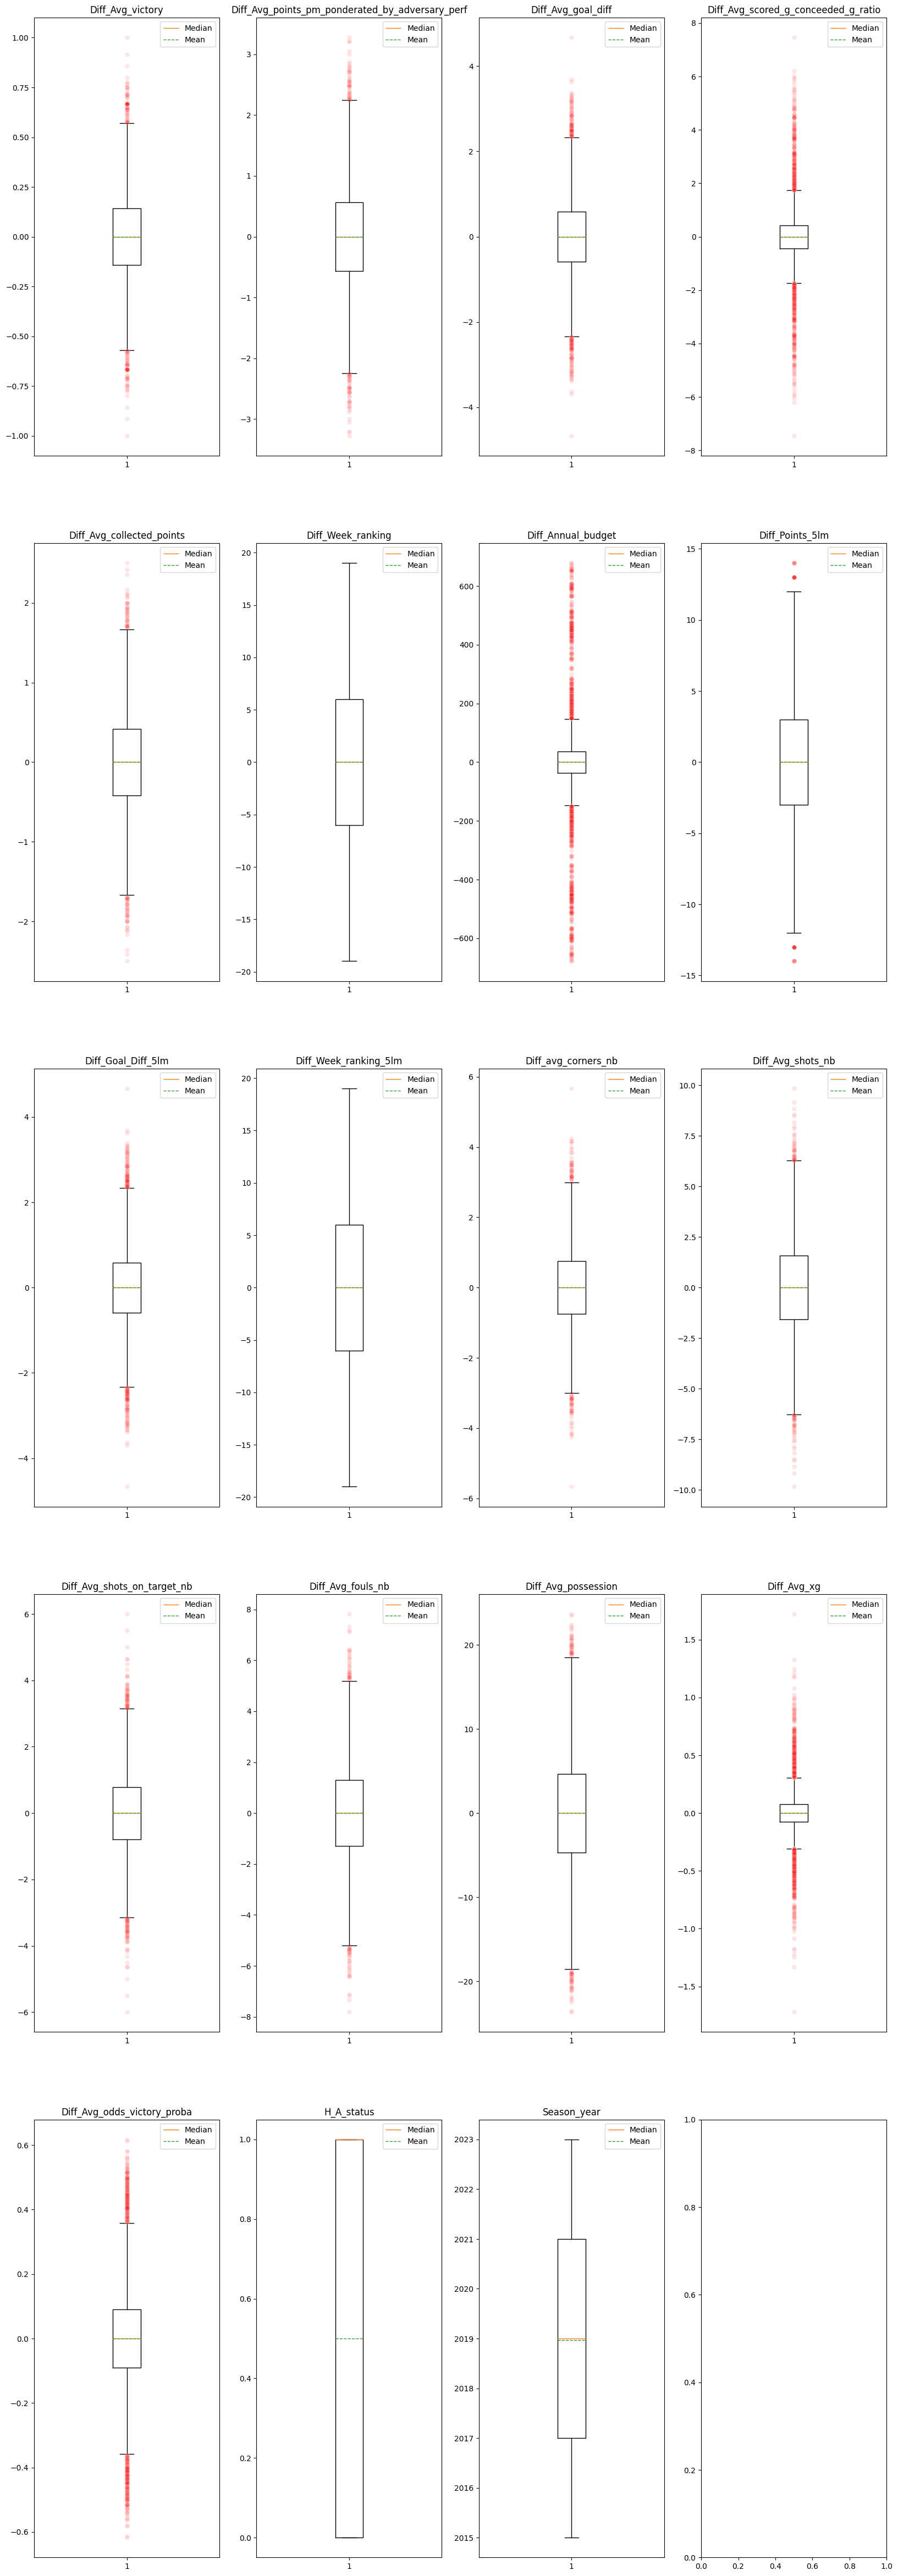

In [15]:
#src.visualization.visualize
from visualization import visualize
visualize.boxplot(dataset_restricted_2.copy())

<span style="color:#FF1493;"> <strong> <font size="4">3) Feature correlation heatmap

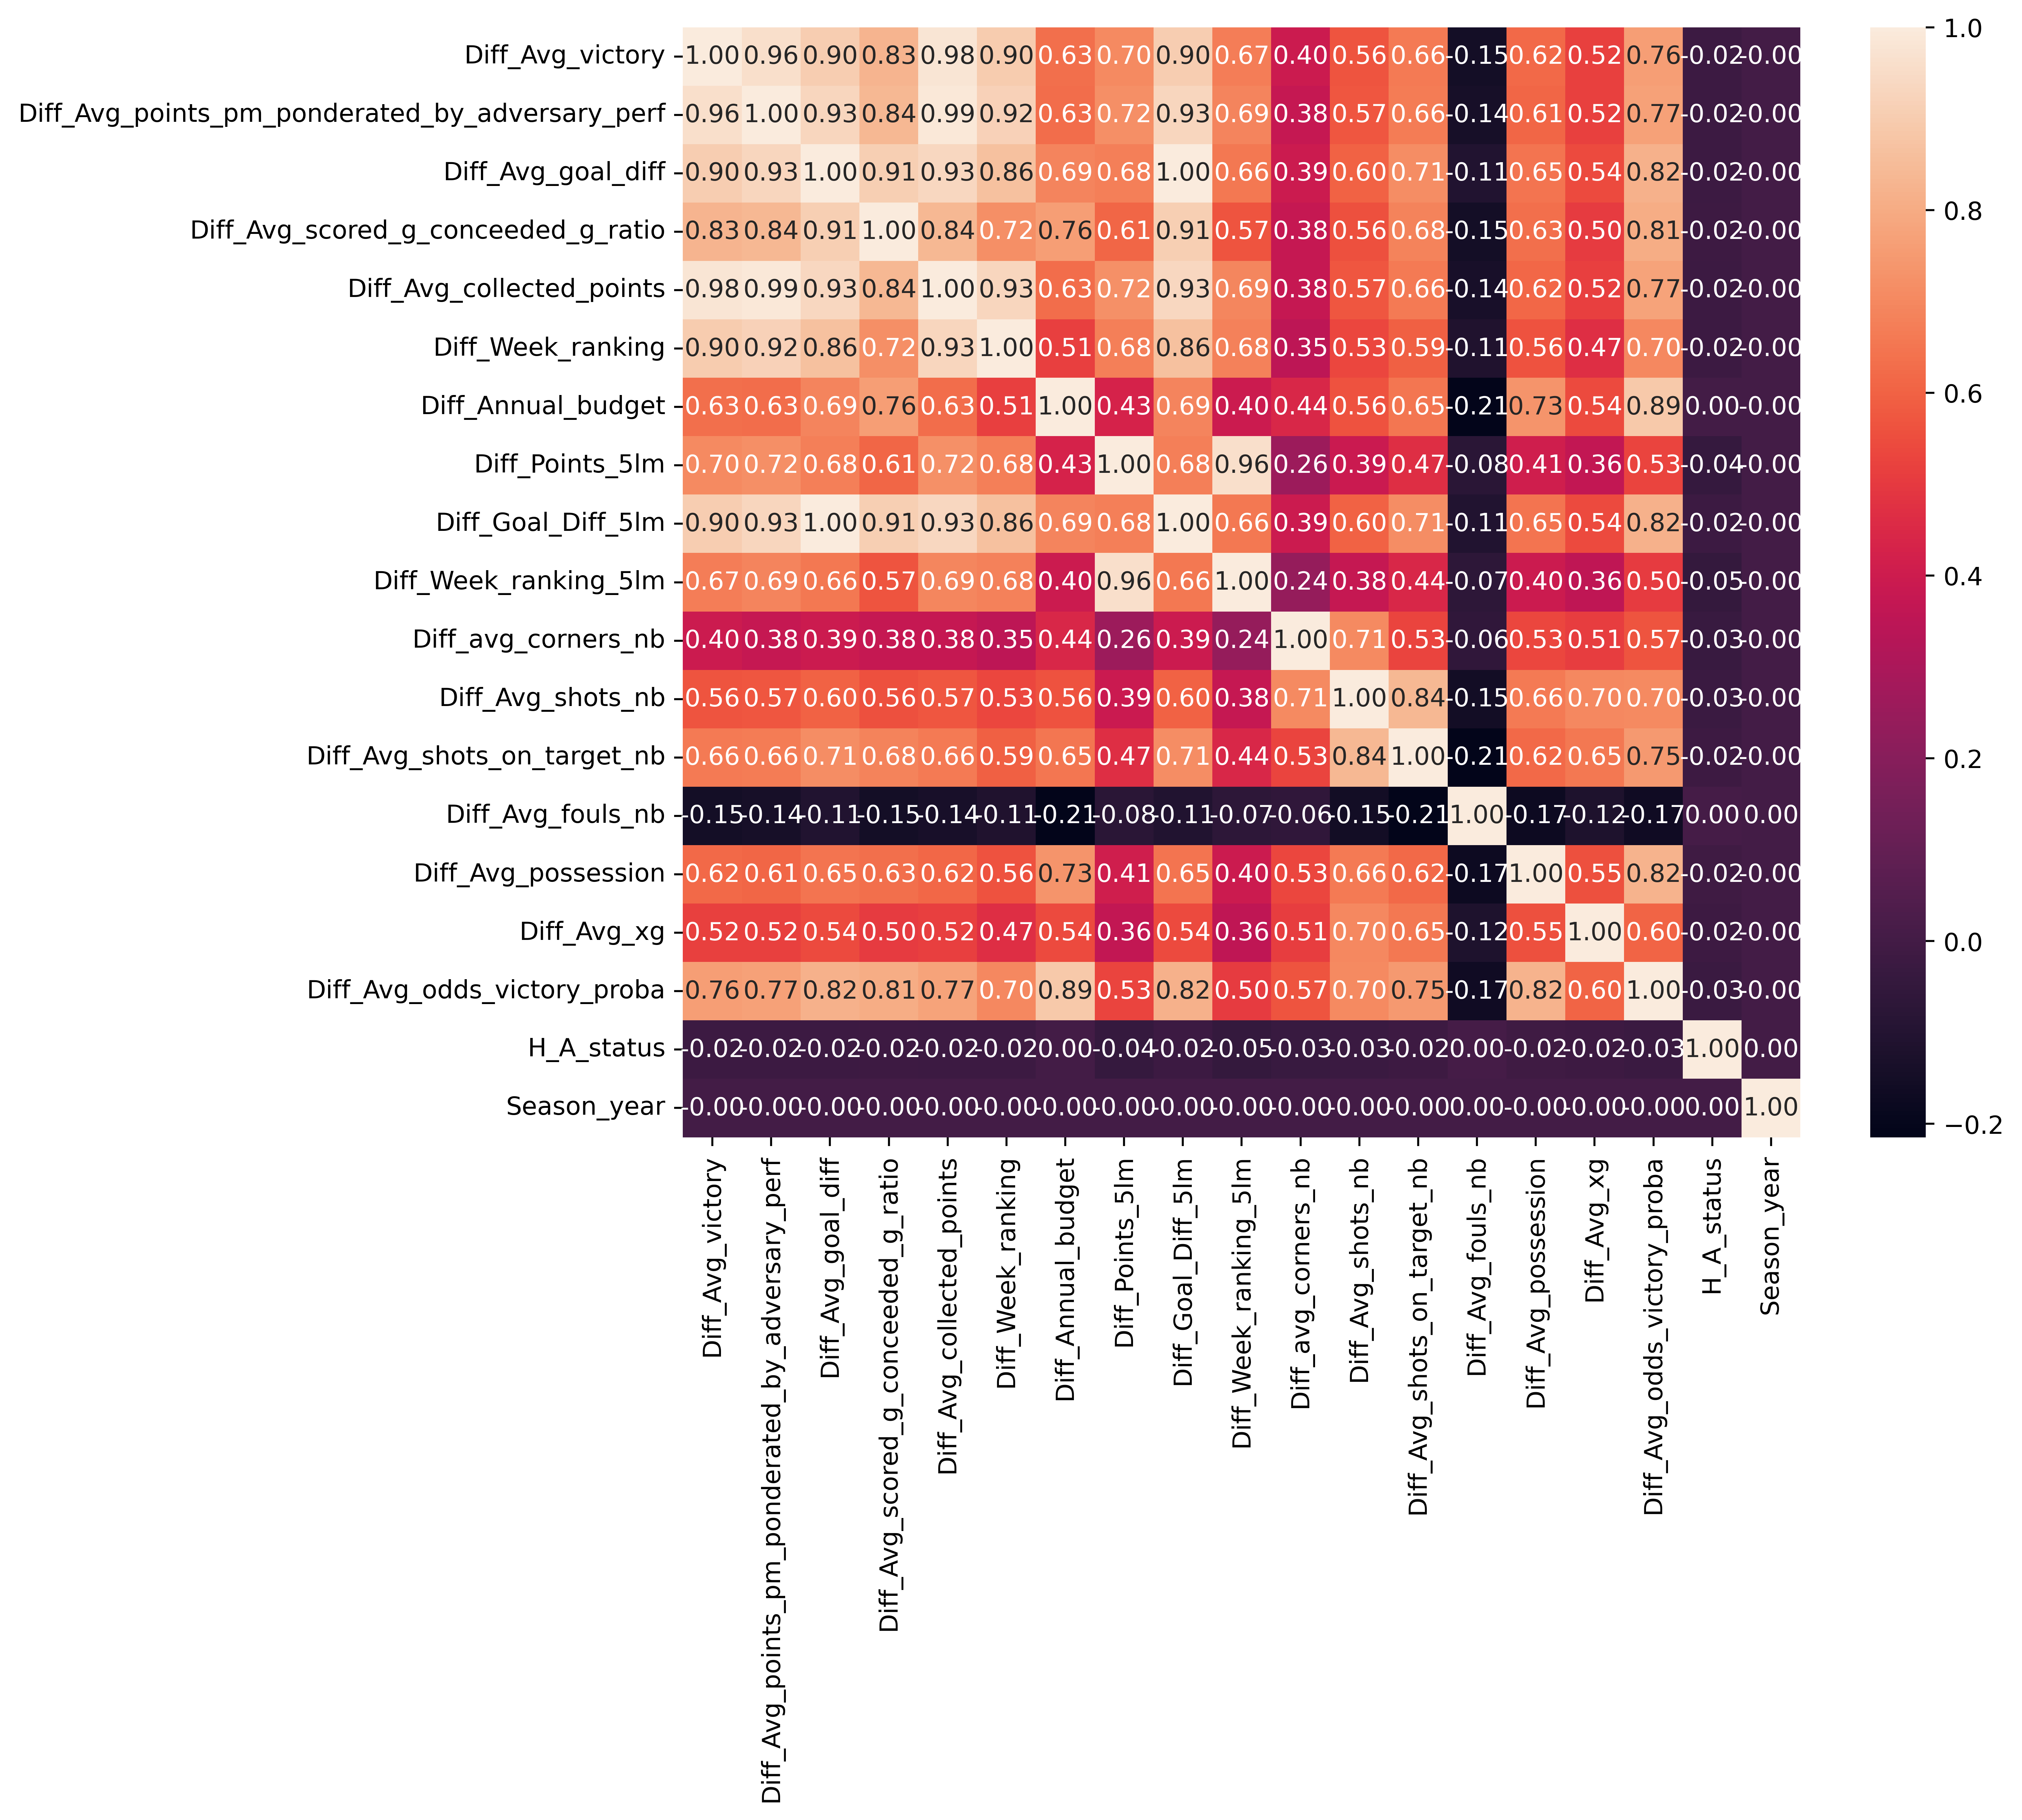

In [16]:
#src.visualization.visualize

visualize.heat_map(dataset_restricted_2.copy())

# V) <u> Preprocessing (out of pipeline)

<span style="color:#FF1493;"> <strong> <font size="4">1) Data Formatting and Splitting (definition of X and Y)

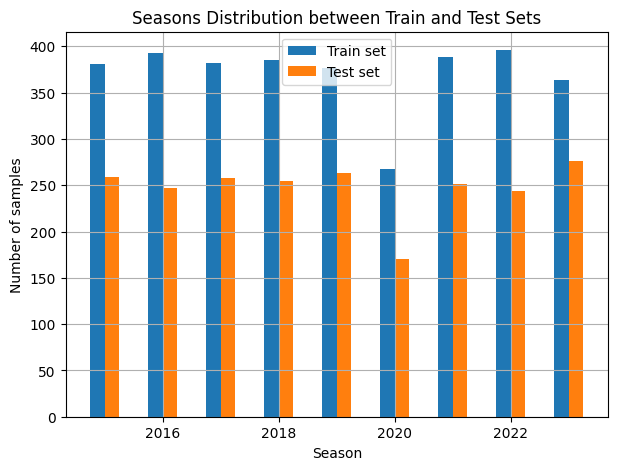

9


In [17]:
#src.data.preprocessing
from data import preprocessing
import matplotlib.pyplot as plt


#Getting formatted X, Y datasets, splitting it into train, valid and test sets
X_train_00, Y_train_00,  X_test_00, Y_test_00 = preprocessing.formatting_splitting(dataset_restricted_2,
                                                                                   ['Diff_Avg_odds_victory_proba', 'Diff_Avg_xg'], 
                                                                                   random_state_0 = 764,
                                                                                   dataset_0 = dataset_26.copy(),
                                                                                   test_proportion = 0.6)

# Visualize the seasons repartition in train, valid, test sets.
preprocessing.hist_seasons( X_test_00.copy(), X_train_00.copy())

<span style="color:#FF1493;"> <strong> <font size="4">2) Filter and Wrapper features selection (version out of the pipeline)

In [18]:
#src.features.features_selection

#This cell is made to test features selectors (Filter and Wrrapper), and conducting feature selection. We do it OUT OF THE PIPELINE beacause the execution of these features selectors significantly slow down the process (particularly for wrapper).
#Les tests doivent être faits sur X_train

#On définit le model qui va etre utilisé pour definir l'ultilité des features et qui va permettre de les sélectionner
from sklearn.linear_model import LogisticRegression
model_tester = LogisticRegression(max_iter=10000, C = 1)
"""
X_wrapped = features_selection.wrapper_features_selection(X_train_00.copy(),Y_train_00.copy(), model_tester)
"""

#Wrapper features selection
from sklearn.feature_selection import f_classif
"""
X_filtered = features_selection.filter_features_selection(X_train_00.copy(),Y_train_00.copy(), 15, f_classif, True)
"""

'\nX_filtered = features_selection.filter_features_selection(X_train_00.copy(),Y_train_00.copy(), 15, f_classif, True)\n'

<span style="color:#808080;"> <strong> <font size="4">3) Outliers treatment (not used but kept in case...)

In [19]:
#src.data.preprocessing

#Deletting outliers frome train set
"""X_train_01, Y_train_01 = preprocessing.outliers_removal(X_0 = X_train_00.copy(), Y_0 = Y_train_00.copy(), iqr_multiplier = 1.9)"""

'X_train_01, Y_train_01 = preprocessing.outliers_removal(X_0 = X_train_00.copy(), Y_0 = Y_train_00.copy(), iqr_multiplier = 1.9)'

# VI) <u> Pipeline development 

<span style="color:#FF1493;"> <strong> <font size="4">1) Pipeline and GridSearchCV implementation

In [20]:

# --------------------------------------------------------------
# Correlated features remover (not used)
# --------------------------------------------------------------
#Correlated features remover definition (it's a transformer)
corr_features_selector = features_selection.correlated_features_removal_transformer(corr_threshold = 0.95)


# --------------------------------------------------------------
# Features selector
# --------------------------------------------------------------
"""
model_sfs = LogisticRegression(max_iter=10000, C = 0.3, random_state =33, penalty = 'l2')
sequ_feat_selector = SFS(estimator = model_sfs, k_features = 'best', forward = True, verbose = 0, cv=CV, scoring = 'neg_log_loss', n_jobs = -1)
"""
#OU

#Filter features selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
filter_feat_selector = SelectKBest(f_classif, k= 10)

# --------------------------------------------------------------
# Scaler
# --------------------------------------------------------------

from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler()


# --------------------------------------------------------------
# Model
# --------------------------------------------------------------
model = LogisticRegression(penalty = 'l1', fit_intercept=True, random_state = 999, solver = 'saga', max_iter= 3000, verbose = False, tol=1e-4)

# --------------------------------------------------------------
# Pipeline
# --------------------------------------------------------------
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[("scaler",scaler), ("features_selector",filter_feat_selector), ("model", model)])


#parameters to optimize definition
import numpy as np
parameters = {'model__penalty': ['l1', 'l2', 'elasticnet', 'None'],
             'model__C': np.logspace(-3, -0., 17),
             'model__solver': ['saga', 'sag', 'liblinear', 'newton-cg', 'lbfgs'],
             'features_selector__k' : [12, 16]
             }

# --------------------------------------------------------------
# GridSearchCV
# --------------------------------------------------------------
# Create a GridSearchCV object
from sklearn.model_selection import GridSearchCV
from configuration import constant_variables

grid_search = GridSearchCV(pipeline, parameters, cv=constant_variables.CV, scoring = 'neg_log_loss', verbose=0)
# Fit the GridSearchCV to the data
grid_search.fit(X_train_00.copy(), Y_train_00.copy().values.ravel())



c:\Users\polol\anaconda3\envs\env-projet-mbappe\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2210 fits failed out of a total of 3400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\polol\anaconda3\envs\env-projet-mbappe\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\polol\anaconda3\envs\env-projet-mbappe\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polol\anaconda3\envs\env-pro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('features_selector', SelectKBest()),
                                       ('model',
                                        LogisticRegression(max_iter=3000,
                                                           penalty='l1',
                                                           random_state=999,
                                                           solver='saga',
                                                           verbose=False))]),
             param_grid={'features_selector__k': [12, 16],
                         'model__C': array([0.001     , 0.00153993, 0.00237137, 0.00365174, 0.00562341,
       0.00865964, 0.01333521, 0.02053525, 0.03162278, 0.04869675,
       0.07498942, 0.1154782 , 0.17782794, 0.27384196, 0.4216965 ,
       0.64938163, 1.        ]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'model__solver': ['saga', 'sag', 'liblinear',
                                           'newton-cg', 'lbfgs']},
             scoring='neg_log_loss')

<span style="color:#FF1493;"> <strong> <font size="4">2) Display GridSearchCV results

In [21]:
#src.pipeline.results
from pipeline import results

#We print the results of GridSearchCV() execution
results.GridSearchCV_results(grid_search, X_train_00.copy())

Best Parameters: {'features_selector__k': 16, 'model__C': 0.01333521432163324, 'model__penalty': 'l2', 'model__solver': 'newton-cg'} 

Best score with these hyper parameters: -0.5970687316508226


Features selected: Index(['Diff_Avg_victory', 'Diff_Avg_points_pm_ponderated_by_adversary_perf',
       'Diff_Avg_goal_diff', 'Diff_Avg_scored_g_conceeded_g_ratio',
       'Diff_Avg_collected_points', 'Diff_Week_ranking', 'Diff_Annual_budget',
       'Diff_Points_5lm', 'Diff_Goal_Diff_5lm', 'Diff_Week_ranking_5lm',
       'Diff_avg_corners_nb', 'Diff_Avg_shots_nb',
       'Diff_Avg_shots_on_target_nb', 'Diff_Avg_fouls_nb',
       'Diff_Avg_possession', 'H_A_status'],
      dtype='object')


<span style="color:#FF1493;"> <strong> <font size="4">3) Model, features, scaler selection


In [22]:
#src.pipeline.model
from pipeline import model
from features.features_selection import restricted_datasets

#On récupère la pipeline avec ses parametres optimaux (déja entrainée)
chosen_pipeline= grid_search.best_estimator_
"""
#On choisit une pipeline enregistrée dans pipeline.model et la selection de features qui va avec
chosen_pipeline = model.pipeline_01
chosen_features = model.features_selected_01

X_train_01 = X_train_00.copy()[chosen_features]
X_test_01 = X_test_00.copy()[chosen_features]
"""

# Train the pipeline chosen
X_test_01 = X_test_00
X_train_01 = X_train_00
chosen_pipeline_trained = chosen_pipeline.fit(X_train_01.copy(), Y_train_00.copy().values.ravel())



<span style="color:#808080;"> <strong> <font size="4">4) Model calibration (Not used anymore)

In [23]:

#definition of a calibrator
"""
from sklearn.calibration import CalibratedClassifierCV
calibrated_pipeline = CalibratedClassifierCV(chosen_pipeline_trained, cv = 'prefit' , method = 'isotonic', ensemble = True)
calibrated_pipeline.fit(X_valid_00.copy(), Y_valid_00.copy())
"""


"\nfrom sklearn.calibration import CalibratedClassifierCV\ncalibrated_pipeline = CalibratedClassifierCV(chosen_pipeline_trained, cv = 'prefit' , method = 'isotonic', ensemble = True)\ncalibrated_pipeline.fit(X_valid_00.copy(), Y_valid_00.copy())\n"

# VII) <u> Pipeline results study

<span style="color:#FF1493;"> <strong> <font size="4">1) Probabilities calibration and distribution study

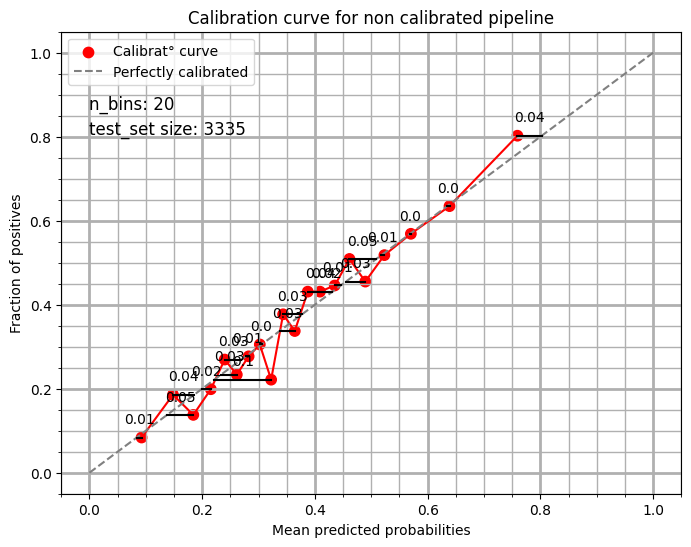

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.03, 0.13]   │                         167 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.13, 0.17]   │                         167 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.17, 0.2]    │                         167 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.2, 0.23]    │                         166 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.23, 0.25]   │                         167 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.25, 0.27]   │                         167 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.27, 0.29]   │                         166 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.29, 0.31]   │                 

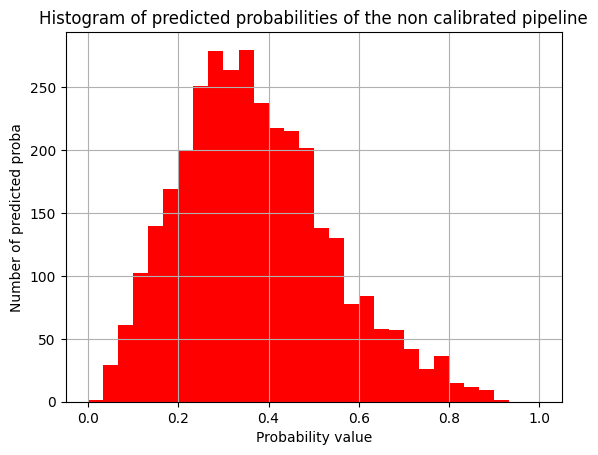

In [24]:
#src.pipeline.results
from pipeline import results


#Plot Calibration curve of the non calibrated pipeline and info about its bins
prob_pred_01, prob_true_01 = results.plot_calibration_curve_2(pipeline_0 = chosen_pipeline_trained,
                                X_test_0 = X_test_01.copy(),
                                Y_test_0 = Y_test_00.copy(),
                                n_bins_0 = 20,
                                strategy_0 = 'quantile',
                                color_0 = 'red',
                                calibrated_model_or_not = False)

#We display statistics on the non calibrated pipeline probabilities deviation 
results.print_calibration_stats(prob_pred_01.copy(),
                                prob_true_01.copy(),
                                'non calibrated')

#We plot the histogram of the proba predicted by the non calibrated pipeline
results.plot_histo_predicted_proba(chosen_pipeline_trained, X_test_01.copy(), 30, 'r', 'non calibrated')

# Display the ratio (probabilities pred/nb of true targets)
results.ratio_proba__sum_true_target(X_train_01.copy(), Y_train_00.copy(), X_test_01.copy(), Y_test_00.copy(), chosen_pipeline_trained)

print(chosen_pipeline_trained.predict_proba(X_test_01)[:,1].sum())


<span style="color:#FF1493;"> <strong> <font size="4">2) Model coefficients study

In [25]:
from tabulate import tabulate
# Access the coefficients from the Logistic Regression step
coefficients = chosen_pipeline_trained.named_steps['model'].coef_
# Get the indices of the selected features
selected_indices = chosen_pipeline_trained.named_steps['features_selector'].get_support(indices=True)
features = X_train_01.columns[selected_indices]
print(coefficients)
# Create lists to store feature names and coefficients
feature_names = []
coeff_values = []

# Display feature names and coefficients
for feature, coef in zip(features, coefficients[0]):
    feature_names.append(feature)
    coeff_values.append(coef)

# Create a dictionary for the model_coeff_table
model_coeff_table = {
    'Feature': feature_names,
    'Coefficient': coeff_values,
}

fancy_model_coeff_table = tabulate(model_coeff_table, headers='keys', tablefmt='fancy_grid')

print(fancy_model_coeff_table)

[[-0.03560013  0.06174017  0.0776599   0.04645525  0.04818772  0.07767598
   0.11098628 -0.01260337  0.0776599   0.06375518  0.08748497  0.09160246
   0.029001   -0.03061876  0.17632341  0.31965973]]
╒═════════════════════════════════════════════════╤═══════════════╕
│ Feature                                         │   Coefficient │
╞═════════════════════════════════════════════════╪═══════════════╡
│ Diff_Avg_victory                                │    -0.0356001 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_points_pm_ponderated_by_adversary_perf │     0.0617402 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_goal_diff                              │     0.0776599 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_scored_g_conceeded_g_ratio             │     0.0464552 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_collected_points                       │ 

# VIII) <u> Learning curves

<span style="color:#FF1493;"> <strong> <font size="4">1) Pipeline learning curve

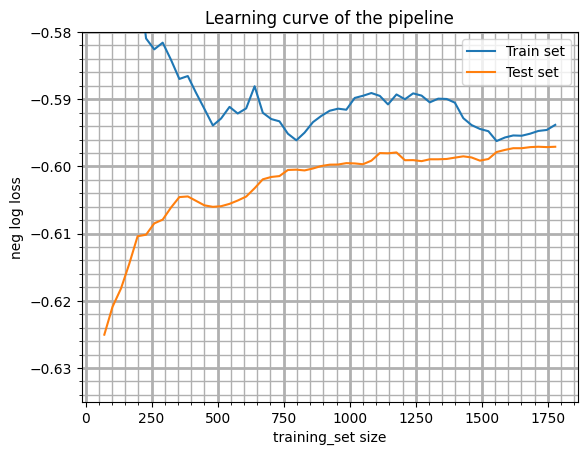

In [26]:
#src.visualization.learning_curves

from visualization import learning_curves

# Plot learning curves for our pipeline
learning_curves.pipeline_learning_curve(X_train_00.copy(),
                                        Y_train_00.copy(),
                                        chosen_pipeline,
                                        'neg_log_loss')

<span style="color:#FF1493;"> <strong> <font size="4">2) Calibrator learning curve

In [27]:
#src.visualization.learning_curves

# Plot the learning curve for the calibrator
learning_curves.learning_curve_calibrator(nb_test_sets_sizes = 25,
                                          X_test_0 = X_test_00.copy(),
                                          X_valid_0 = X_valid_00.copy(),
                                          Y_test_0 = Y_test_00.copy(),
                                          Y_valid_0 = Y_valid_00.copy(),
                                          test_size_0 = 0.6,
                                          pipe_0 = chosen_pipeline_trained,
                                          n_bins_0 = 15,
                                          cross_val_nb = 25)

NameError: name 'X_valid_00' is not defined